In [ ]:
"""
Problem 1.5
Repeat experiment (4) using the following mean vector for G(θ): 
[-10.54, 0.465, 0.0087, -0.093, 0, -0.004]
With sigma_htta_sq =0.05, perform the experiment four times, using two different 
values for sigma_theta_sq (0.1 and 2) and two different values for N (20 and 500). 
Comment on your results. 

"""

import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
from functions_problems_1b import *

In [ ]:
"""
Parameters
"""
#True theta vector
theta_true = np.array([0.2, -1, 0.9, 0.7, 0, -0.2])


thetas = np.array([-10.54, 0.465, 0.0087, -0.093, 0, -0.004])

#How many points
Ns = [20, 500]

#Uncertainty of our knowledge of θ0
sigma_theta_sq = [0.1, 2]

#Noise variance
sigma_htta_sq = 0.05
#Mean of the noise
mu_noise = 0

#Idenity matrix
id = np.identity(thetas.shape[0])

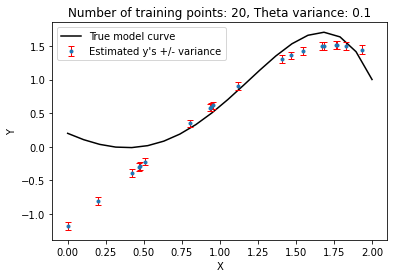

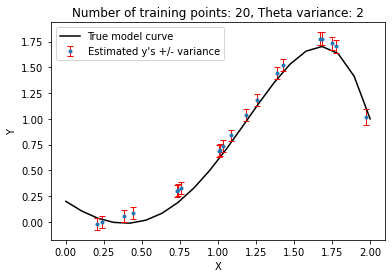

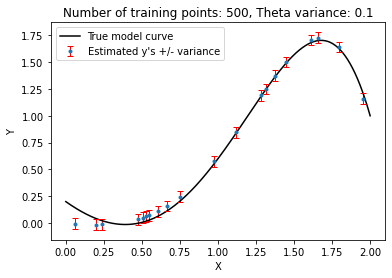

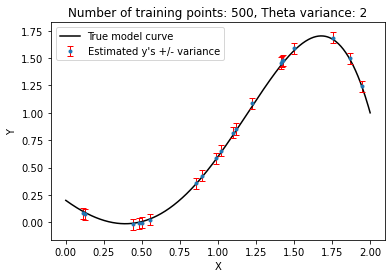

In [ ]:
for N in Ns:
    for theta_var in sigma_theta_sq:
        #Create the training set
        #Get N equidistant points in the interval [0,2] for the training set
        X_train = np.linspace(0,2, N)

        #Get the Phi matrix for the training set
        phi_matrix = get_Phi(X_train, 5, N)

        #Get the y vector (y_true: without added noise, y_train: with added noise)
        y_true, y_train = get_y_vector(theta_true, phi_matrix, mu_noise, sigma_htta_sq, N)

        #Get the mean theta given y vector
        mu_th_y = fun_mu_th_y(sigma_htta_sq, theta_var, thetas, phi_matrix, y_train, id)

        #Create the test set
        #Get 20 random points from a uniform distribution in the interval [0,2]
        x_test = np.random.uniform(0, 2, 20)

        #Get the mean y's and the variance of y's
        mu_y, sigma_y = fun_mu_sigma_y(x_test, 5, 20, mu_th_y, sigma_htta_sq, theta_var, phi_matrix)

        #Create a plot of the estimates (blue dots) and their errors (red error bars) against the true model curve (green line)
        plt.title('Number of training points: %s, Theta variance: %s'%(N, theta_var))
        plt.plot(X_train, y_true, 'k-', label="True model curve")
        plt.errorbar(x_test, mu_y, yerr=sigma_y, linestyle='None', marker='.', elinewidth=1, capsize=3, 
                     ecolor = "r", label="Estimated y's +/- variance")
        plt.legend(loc="upper left")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()